# Cyclistic Bike-Share Case Study  
Understanding differences between annual members and casual riders

## 1. Introduction  
This notebook summarizes the full analysis of the Cyclistic bike-share dataset, following the Google Data Analytics Capstone framework. The aim is to understand how annual members and casual riders differ in their usage patterns and provide recommendations to increase annual memberships.

## 2. Business Task (ASK)  
Cyclistic aims to convert more casual riders into annual members. To support this goal, we analyze 12 months of ride data to identify differences in behavior between member and casual rider groups.

## 3. Data Description (PREPARE)  
The dataset comes from the public Divvy trip data provided by Motivate International Inc. It contains 12 CSV files, one for each month, with fields such as ride_id, start and end times, stations, bike type, and rider type.

Because the full dataset contains millions of rows, data cleaning and transformation were performed in **Google BigQuery**, and only summary tables are imported here for analysis and visualization.

We will load:
- Rides by user type  
- Average ride length  
- Rides by day of week  
- Average ride length by day  
- Monthly ridership  
- Bike type usage  


## 4. Data Processing Summary (PROCESS)

Because the original Cyclistic dataset consists of millions of rows, all cleaning and transformations were performed in Google BigQuery. The following steps were applied to prepare the data for analysis:

- All 12 monthly CSV files were uploaded to Google Cloud Storage and imported into BigQuery.
- The files were combined into a single table using `UNION ALL`.
- Rows with missing critical fields (timestamps, station names, bike type, user type) were removed.
- A new field `ride_length_min` was created using:
TIMESTAMP_DIFF(ended_at, started_at, MINUTE)
- A `day_of_week` column was extracted from `started_at`.
- Trips with negative or unrealistic durations (> 24 hours) were removed.
- Duplicate `ride_id` values were identified and removed.

After these steps, a clean final table (`all_trips_final`) was used to generate aggregated summary tables for visualization in this notebook.


In [25]:
import pandas as pd

rides_by_user = pd.read_csv("/kaggle/input/cyclistic-annual-bike-rentals-summaries/rides_by_user_type")
avg_length_user = pd.read_csv("/kaggle/input/cyclistic-annual-bike-rentals-summaries/avg_ride_length_by_user")
rides_by_weekday = pd.read_csv("/kaggle/input/cyclistic-annual-bike-rentals-summaries/rides_by_weekday")
avg_length_weekday = pd.read_csv("/kaggle/input/cyclistic-annual-bike-rentals-summaries/avg_length_by_weekday")
seasonality = pd.read_csv("/kaggle/input/cyclistic-annual-bike-rentals-summaries/seasonality_monthly")
bike_type_usage = pd.read_csv("/kaggle/input/cyclistic-annual-bike-rentals-summaries/bike_type_usage")


## 5. Analysis & Visualizations (ANALYZE & SHARE)

### 5.1 Total Rides by User Type

This visualization compares total annual rides completed by members versus casual riders.


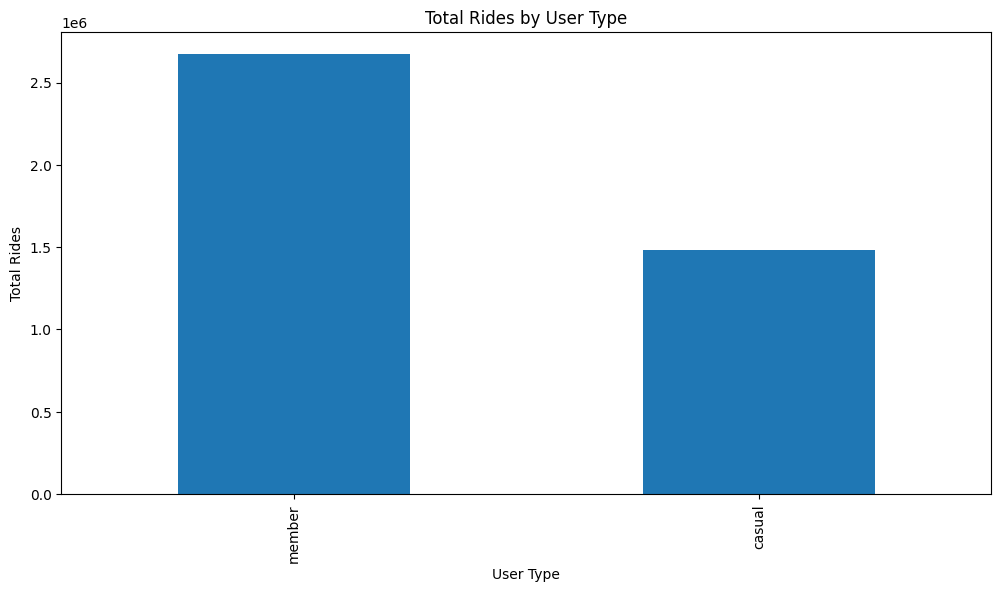

In [26]:
ax = rides_by_user.plot(
    x="member_casual",
    y="total_rides",
    kind="bar",
    figsize=(12,6),
    title="Total Rides by User Type",
    legend=False
)

ax.set_xlabel("User Type")
ax.set_ylabel("Total Rides")
plt.show()



### 5.2 Average Ride Length by User Type

Casual riders take significantly longer trips compared to members, indicating leisure-oriented behavior.


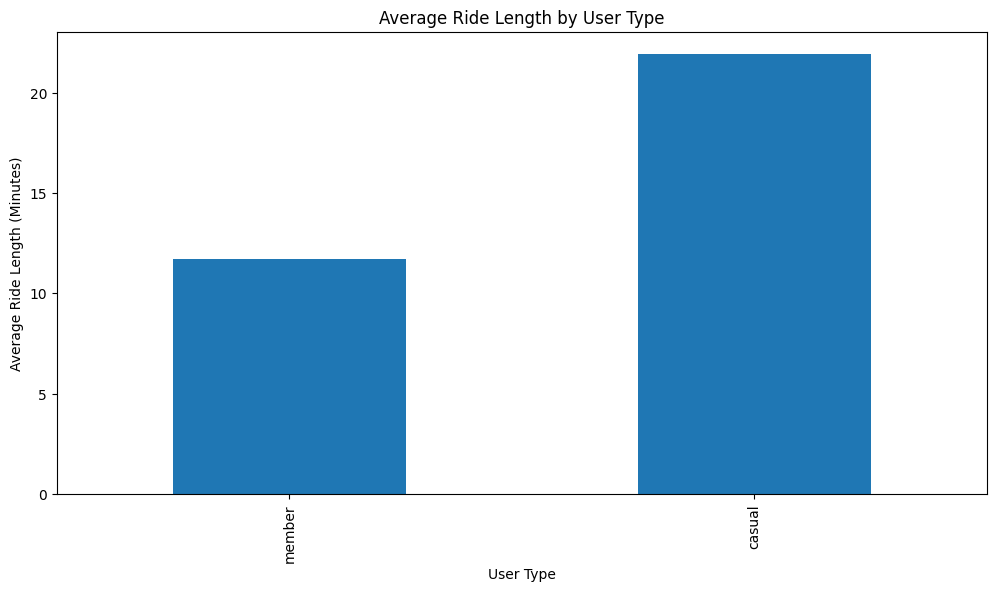

In [27]:
ax = avg_length_user.plot(
    x="member_casual",
    y="avg_ride_length",
    kind="bar",
    figsize=(12,6),
    title="Average Ride Length by User Type",
    legend=False
)

ax.set_xlabel("User Type")
ax.set_ylabel("Average Ride Length (Minutes)")
plt.show()



### 5.3 Rides by Day of Week (Member vs Casual)

This visualization shows weekday vs weekend riding patterns. Members ride heavily during weekdays, while casual riders peak on weekends.


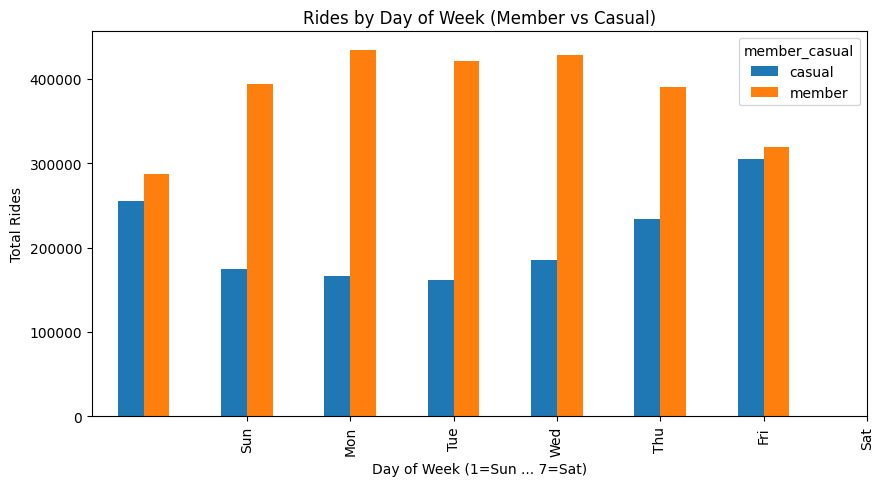

In [28]:
import matplotlib.pyplot as plt

pivot_weekday = rides_by_weekday.pivot(index="day_of_week", columns="member_casual", values="total_rides")
pivot_weekday.plot(kind="bar", figsize=(10,5), title="Rides by Day of Week (Member vs Casual)")
plt.xlabel("Day of Week (1=Sun ... 7=Sat)")
plt.ylabel("Total Rides")
plt.xticks([1,2,3,4,5,6,7], ["Sun","Mon","Tue","Wed","Thu","Fri","Sat"])

plt.show()


### 5.4 Average Ride Length by Day of Week

Casual riders take longer trips every day of the week, especially on weekends.


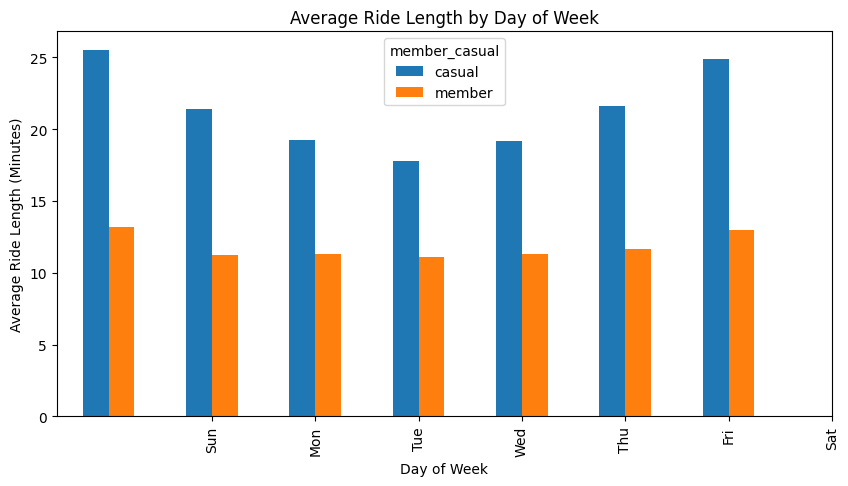

In [29]:
pivot_avg_length = avg_length_weekday.pivot(index="day_of_week", columns="member_casual", values="avg_ride_length")
pivot_avg_length.plot(kind="bar", figsize=(10,5), title="Average Ride Length by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Average Ride Length (Minutes)")
plt.xticks([1,2,3,4,5,6,7], ["Sun","Mon","Tue","Wed","Thu","Fri","Sat"])
plt.show()


### 5.5 Monthly Ridership Trends (Seasonality)

Casual riders show strong seasonality with peaks in summer, while members have steady usage year-round.


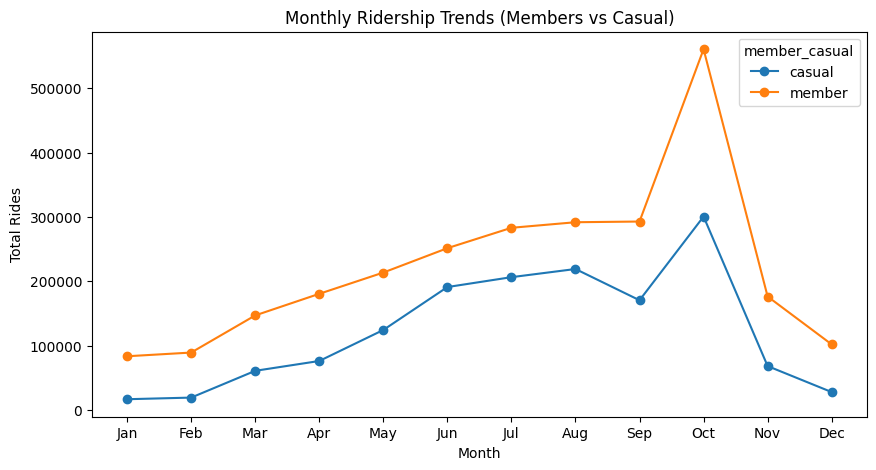

In [30]:
pivot_seasonality = seasonality.pivot(index="month", columns="member_casual", values="total_rides")
pivot_seasonality.plot(kind="line", marker='o', figsize=(10,5), title="Monthly Ridership Trends (Members vs Casual)")
plt.xlabel("Month")
plt.ylabel("Total Rides")
plt.xticks(range(1,13), ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])
plt.show()


### 5.6 Bike Type Preference

Casual riders prefer electric bikes more often than members.


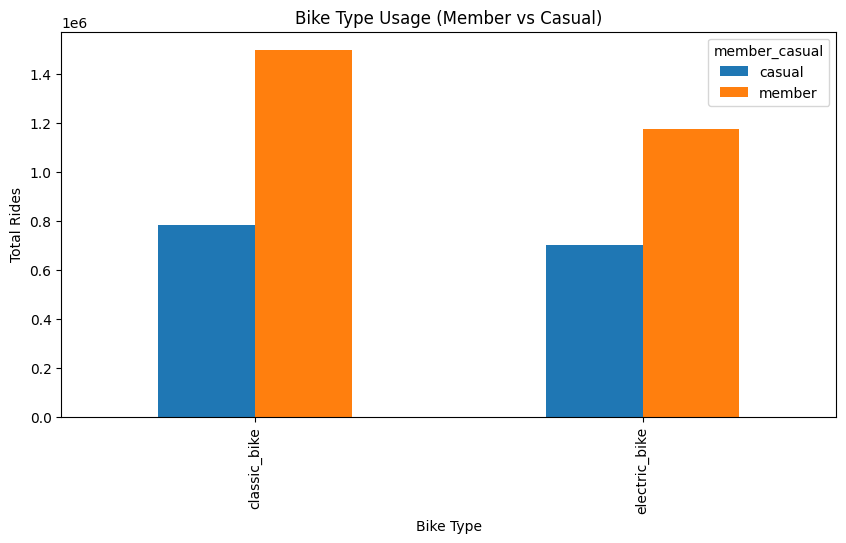

In [31]:
pivot_bike = bike_type_usage.pivot(index="rideable_type", columns="member_casual", values="total_rides")
pivot_bike.plot(kind="bar", figsize=(10,5), title="Bike Type Usage (Member vs Casual)")
plt.xlabel("Bike Type")
plt.ylabel("Total Rides")
plt.show()


## 6. Recommendations (ACT)

Based on the analysis, three key strategies are recommended:

1. **Target Weekend and Leisure Riders:**  
   Casual riders use the system primarily on weekends and take long-duration leisure trips. Tailored weekend membership offers or post-ride promotions can convert these riders.

2. **Promote Membership Benefits for Electric Bike Users:**  
   Casual riders frequently use electric bikes, which cost more per trip. Highlighting savings and offering electric-bike add-on passes could encourage membership.

3. **Focus on Commuters with Weekday Campaigns:**  
   Members ride most often on weekdays, showing commuter behavior. Marketing messages emphasizing reliability, convenience, and employer partnerships can attract more weekday users.


## 7. Conclusion

This analysis highlights clear behavioral differences between Cyclistic's annual members and casual riders. Members rely on Cyclistic for consistent weekday commuting, while casual riders show strong seasonal and weekend-oriented leisure patterns. These insights support targeted marketing strategies to increase annual memberships and improve long-term revenue stability.
